# Plotting with Matplotlib
---
Notebook by Alice Hsu (Mar 2025), with adapted examples from prior UEA Python PPDs

Concepts covered:
* Subplots
* Line plots
* Scatter plots
* Histograms/Violin plots
* Contours and heatmaps
    * Gridded data and `meshgrid()`
* Cartopy
---

<img src="figures/mpl_logo2_compressed.svg" style="height:80%; width:75%;">

# Introduction

Matplotlib is a **Python plotting library** for producing publication quality figures. 
* It is the most widely used plotting package in Python. You can make:
    * line plots
    * scatter plots
    * pie charts
    * bar charts
    * histograms
    * 2D and 3D plots
    * maps
    * ...and more!
* Matplotlib has **very in-depth online documentation**:
    * Detailed descriptions of **different plot types and how to create them**: [matplotlib.org](https://matplotlib.org/index.html)
    * Many **useful examples** in the [gallery](https://matplotlib.org/gallery.html) that you can **copy-paste** from
    * If you can't find exactly what you need, there's most likely a **Stack Overflow** post for your problem.
    * Free [cheatsheet](https://github.com/matplotlib/cheatsheets)

In [1]:
import matplotlib.pyplot as plt    # most of the time, pyplot is the only matplotlib submodule we need.
import numpy as np
import pandas as pd
import cartopy
# we'll need numpy to create and read some data to plot.
# import warnings                  
# warnings.filterwarnings('ignore')  # to keep the notebook smooth for teaching, don't do this all the time.

To be efficient with matplotlib, you first need to understand its **terminology**:

# Anatomy of a Matplotlib Figure

## Figure, Axes or Axis? 
* The **figure** is the **whole image**, the top-level 'container' that holds all the pieces ("objects") of your figure.
* The **axes** is the part of a **figure** where you actually plot your data and control how your data is displayed. For example, you use the axes to:
    * Set the **data limits**
    * Set **tick marks** and their **labels**
    * Set **axes labels**
    * Set **subplot titles**
    * Customize your plot, e.g., **colors/colormaps, line widths, marker shapes, etc**.
* A **figure** can have multiple **axes** - for example, two subplots on a single figure.

<img src="figures/matplotlib_figure_parts.png" style="height:65%; width:55%;">

There are several ways to create the same plot with Matplotlib. For example, the following lines of code all produce the same thing:

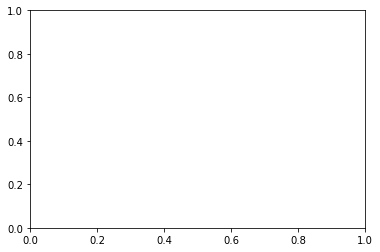

In [6]:
fig = plt.figure() # Create a figure
axes = fig.add_subplot() # add one Axes to Figure

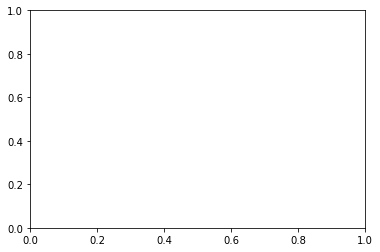

In [5]:
axes = plt.subplot()

However, the most flexible option is `fig, ax = plt.subplots()`, so we will be using this one through the rest of the notebook.

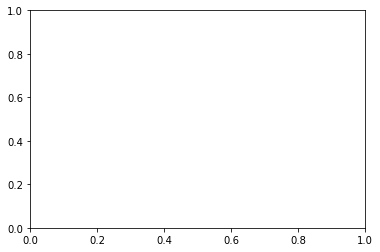

In [7]:
fig, ax = plt.subplots()

## Multiple Subplots

Note that you can **create multiple subplots** by simply specifying numbers in the parentheses of `plt.subplots()`.
    
   * The **first number in `plt.subplots()`** represents the **number of rows**.
   * The **second number in `plt.subplots()`** represents the **number of columns**.

For example:

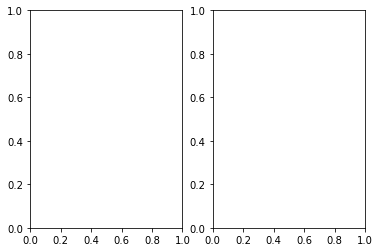

In [13]:
fig, axs = plt.subplots(1,2)

You can also change the figure size to accommodate the number of subplots using the `figsize` argument.
* The **first number in `figsize`** represents the **width of the row**.
* The **second number in `figsize`** represents the **height of the column**.

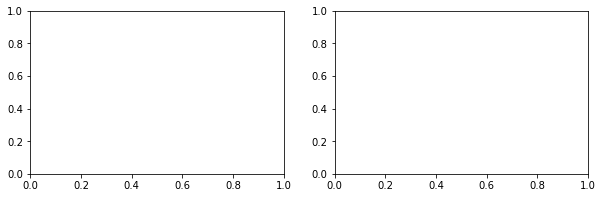

In [38]:
fig, axs = plt.subplots(1,2,figsize=(10,3))

You can also create a **grid of subplots**.

In this example below, we have **6 total subplots** in **2 rows** and **3 columns**.

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

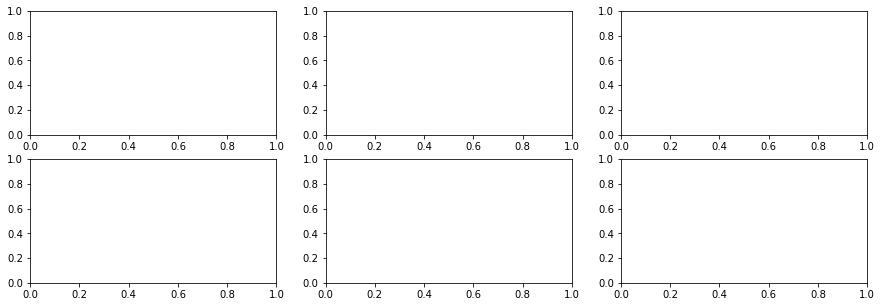

In [38]:
fig, axs = plt.subplots(2,3,figsize=(15,5))

Note that if you create a **2x3 grid of subplots**, then `axs` is a **2x3 array** containing **6 axes**:

In [40]:
axs

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

Note that to **access a specific axes** within the grid of subplots, you have to **specify an index** for the **row** and the **column**:

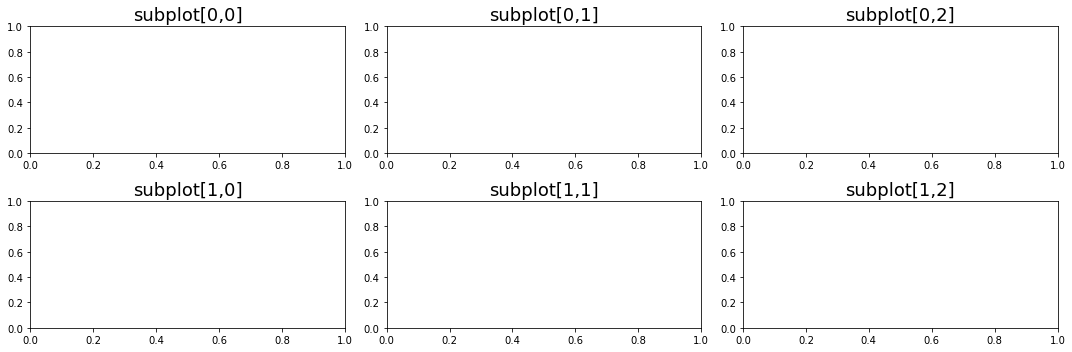

In [34]:
fig, axs = plt.subplots(2,3,figsize=(15,5))
axs[0,0].set_title('subplot[0,0]', fontsize=18);
axs[0,1].set_title('subplot[0,1]', fontsize=18);
axs[0,2].set_title('subplot[0,2]', fontsize=18);
axs[1,0].set_title('subplot[1,0]', fontsize=18);
axs[1,1].set_title('subplot[1,1]', fontsize=18);
axs[1,2].set_title('subplot[1,2]', fontsize=18);

plt.tight_layout()

(The `plt.tight_layout()` line just tells Matplotlib to tidy up the layout so that the plots don't overlap with the plot titles.)

# Creating your first plot: Line plots

## Creating and Adding Data to Line Plots

Note that the key to successfully creating any plot in Python is deciphering **what inputs** the plotting functions take and what **format** the data needs to be in.

We will create our first plot using the **`plot()`** function, which creates a simple **line plot**.

To use the **`plot()`** function ([documentation here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)), it looks like we need to specify an **x** and a **y** as **inputs**:

<img src="figures/matplotlib_plot_doc.png">

Additionally, it looks like **x** and **y** are generally **formatted** as 1D arrays.

Let's **create some data to plot**. Let's say our **x values** are:

In [20]:
x1 = np.array([2,4,6,8,10])

<span style="color:blue"><u>**Exercise 1:**</u>

Create a corresponding vector **`y1`** to plot as the y values. How many elements must **`y1`** have?

In [27]:
#### YOUR CODE HERE ####
y1 = np.array([])

To actually **plot the data** we've created in `x1` and `y1`, the syntax would be:

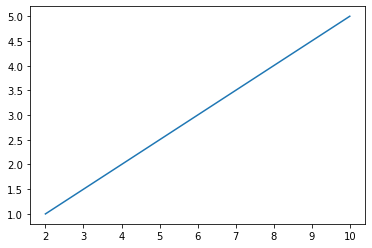

In [28]:
fig, ax = plt.subplots()  # creates one figure and one axes by default
ax.plot(x1,y1) # add the data onto the axes we just created

Congratulations! You've just created your first plot!

But now let's say we have a second dataset that we want to plot, stored in the variables `x2` and `y2`.

In [23]:
x2 = np.arange(0,10)
y2 = x2**2

print(x2)
print(y2)

[0 1 2 3 4 5 6 7 8 9]
[ 0  1  4  9 16 25 36 49 64 81]


<span style="color:blue"><u>**Exercise 2**</u>:

How would we add `x2` and `y2` to the same figure (`fig`) and axes (`ax`)?

In [ ]:
fig, ax = plt.subplots()  # creates one figure and one axes by default
ax.plot(x1,y1) # add the data onto the axes we just created

#### YOUR CODE HERE ####


Now, what if we wanted to plot our two datasets on **two separate subplots**?

First, let's create a **figure** with **two subplots**:

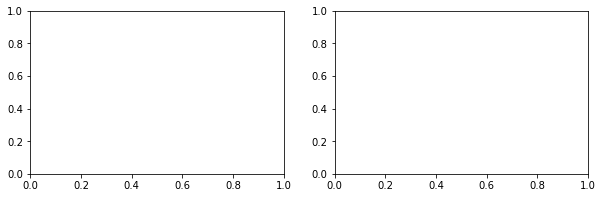

In [24]:
fig, axs = plt.subplots(1,2,figsize=(10,3)) # creates one figure and one axes by default

Notice that we now have **multiple subplots** to choose from to plot our data on.

Let's take a look at the differences between the variables `axs` vs `ax` from above:

In [33]:
axs

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

In [34]:
ax

<AxesSubplot:>

Notice that in this case, `axs` is an **array** containing **2 subplots**.

Thus, in order to add data to this figure, we need to **specify which subplot** we want to add the data to.

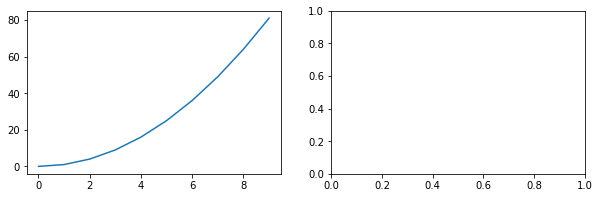

In [36]:
fig, axs = plt.subplots(1,2,figsize=(10,3))
axs[0].plot(x2,y2) # add the data onto the first axes (index 0) we just created

<span style="color:blue"><u>**Exercise 3**</u>:

Plot `x1` and `y1` on the first subplot. Then, plot `x2` and `y2` on the second subplot.

In [ ]:
x1 = np.array([2,4,6,8,10])
y1 = x1/2

x2 = np.arange(0,10)
y2 = x2**2

fig, axs = plt.subplots(1,2,figsize=(10,3))

#### YOUR CODE HERE ####
axs[].plot()

`plt.subplots()` is a function that creates a figure and a grid of subplots with a single call, while providing reasonable control over how the individual plots are created. 

## Customizing Styles and Appearances

When creating plots, you may want or need to **change the appearance** of the different parts of the figure. In this section, we'll look at **several common parameters you can customize** on your plots.

Let's start by first creating some data to plot. In this example, we will **plot two cosine waves** with different amplitudes **on the same subplot**.

First, we create the data:

In [51]:
# Create data using numpy: 
X = np.linspace(-np.pi,          # evenly spaced 1D array with 100 numbers from -pi
                np.pi, 20)      # to pi
Y1 = np.cos(X)                 # take the cosine of the array we just created
Y2 = 2*np.cos(X)               # take the cosine of the array we just created, multiplied by 2

<span style="color:blue"><u>**Exercise 4**</u>:

Add both the datasets (`X` and `Y1`, then `X` and `Y2`) to the same plot.

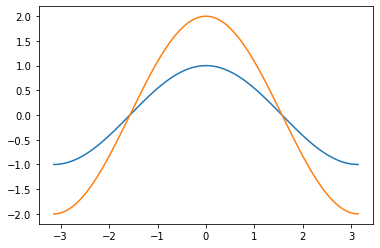

In [40]:
fig, ax = plt.subplots()   # calling subplots without any arguments creates one figure and one axes by default

### YOUR CODE HERE ###
ax.plot()             # plot the cosine of X against X on the axes we just created
ax.plot()             # plot the cosine of X multiplied by 2 against X on that same axes

### Keyword Argument Settings

There are several **keyword arguments** you can specify within the `plot()` function to change the **appearance of the data** itself, including:
* **Line color** (`color`)
    * For some colors, you can simply set this equal to the name of the color as a string
    * Check the named colors [documentation](https://matplotlib.org/stable/gallery/color/named_colors.html) to **check which colors** this applies to.
    * For more precision, you can also set this argument equal to an RGB e.g., `color=[0.5,0.3,0.7]`
* **Transparency of color** (`alpha`)
* **Line width** (`linewidth`)
* **Line style** (`linestyle`)
    * Check the `linestyle` [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle) to check the **syntax for different line styles**.
* **Marker shape** (`marker`)
    * Check the `marker` [documentation](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers) to check the **syntax for different marker shapes**.
* **Marker size** (`markersize`)
* **Marker color** (`markerfacecolor`)

To set each of these appearances, simply **set each keyword argument equal to a valid value**. Note that some keyword arguments take strings as arguments, while others may take numbers.

<span style="color:blue"><u>**Exercise 5**</u>:

Add `X` and `Y2` to the plot below and customize its appearance such that
* There is an **orange, triangle shaped marker** at each point
* There is a **purple, dotted line** connecting each marker

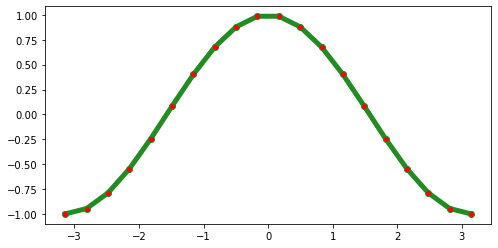

In [58]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(X,Y1,color='forestgreen',marker='o',markerfacecolor='red',linewidth=5)

#### YOUR CODE HERE ####


### Axis Settings Methods

In addition to keyword arguments for modifying the data's appearance, you can also change/set the **appearance of the axes** itself. Some examples include:
* **Subplot titles** (`set_title()`)
* **Labels of x- or y-axis** (`set_xlabel()`, `set_ylabel()`)
* **Limits of the x- or y-axis** (`set_xlim()`, `set_ylim()`)
* **Ticks on the x- or y-axis** (`set_xticks()`, `set_yticks()`)
* **_Labels_ of the ticks on the x- or y- axis** (`set_xticklabels()`, `set_yticklabels()`)


* Note that for any text (titles, axes labels, tick labels), you can change the font size (`fontsize`) or font color (`fontcolor`) using keyword arguments within the respective functions.

To set each of these appearances, you must **specify the set of axes you want to modify** (if there is more than one). Then, **specify the inputs** that are required for each of the methods. Check the documentation to see what inputs are needed for each of the methods.

<span style="color:blue"><u>**Exercise 6**</u>:

Add `X` and `Y2` to the subplot on the right and
* Modify that subplot so that it has the **same x-ticks and y-ticks as the left subplot**.
* Give it a **title**.

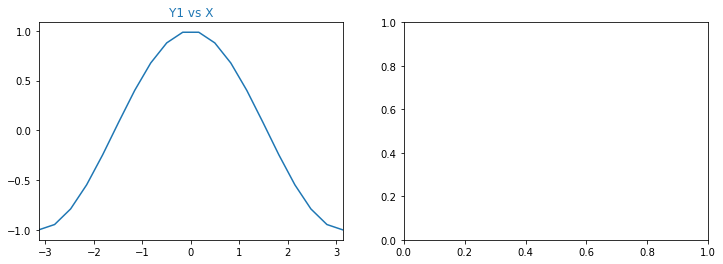

In [69]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(X,Y1)
ax[0].set_title('Y1 vs X',fontsize=12,color='tab:blue')
ax[0].set_xlim([-np.pi,np.pi]);
ax[0].set_yticks([-1,-0.5,0,0.5,1]);

#### YOUR CODE HERE ####

### <span style="color:blue"><u>Challenge Exercise: GDP per Country</u> (12 min)

In this exercise, we will be **plotting the per capita GDP data for 5 different countries** for every year **between 2000-2020**.

The data has already been read in for you from the Excel sheet - just run the cell below!

In [44]:
years = np.arange(2000,2021)

GDP_data = pd.read_excel('data/GDP_data.xls',sheet_name='Data',index_col=0).T

BRA = GDP_data['Brazil'].values
CHI = GDP_data['China'].values
EGY = GDP_data['Egypt, Arab Rep.'].values
FRA = GDP_data['France'].values
IND = GDP_data['India'].values

Create a line plot of each country's per capita GDP vs the year on the same subplot. After you have added each country's data, make the following modifications to your plot:
1. Create a **figure and axes** with **one subplot**.
    * Set the figure size to a size that is easily readable.
1. Add all the **countries' data** to the same subplot.
    * Think about: what goes on the x-axis? What goes on the y-axis?
1. Change the **line color** of each country's data to the following:
    * Brazil (green), China (red), Egypt (black), France (blue), India (orange)
1. Add an appropriate **title** to your plot.
2. Add an appropriate **x-axis label**.
3. Add an appropriate **y-axis label**.
4. Change the **x-axis limits** to the start and end year (2000 and 2020).
5. Change the **y-axis limits** so that all of the data is easily visible.
6. Change the **x-ticks** so that they only go in 5 year increments (i.e., 2000, 2005, 2010, etc).
7. Add a **legend** to your plot. You will need to find the documentation online. If the documentation is confusing, try looking at Stack Overflow!
    * Hint: It is best to use the keyword argument `label` within the `ax.plot()` function call.

In [ ]:
#### YOUR CODE HERE ####





# Other Plot Types in Matplotlib

## Scatter Plots

Scatter plots are similar to line plots in that they can represent 2D data. They are useful for exploratory analysis and looking for possible trends in your data.

For example, consider a **dataset** on **used cars and their prices**:

In [2]:
car_data = pd.read_csv('data/car_data.csv')
car_data

,price_inr,age_yr,mileage_km,transmission,color,engine_cc,seats,tank_size_l
0,515000,3,3395,Manual,Others,1086,5,35.0
1,610000,3,3800,Manual,White,998,4,55.0
2,625000,3,7000,Manual,Grey,1196,7,40.0
3,650000,3,6000,Manual,White,1197,5,37.0
4,700000,3,1000,Manual,White,1199,5,35.0
...,...,...,...,...,...,...,...,...
1875,1000000,15,67000,Automatic,Silver,1798,5,63.0
1876,1000000,15,127000,Manual,White,2982,7,80.0
1877,1150000,15,120000,Automatic,Silver,2987,5,80.0
1878,1195000,15,74000,Automatic,Silver,2497,5,70.0


Suppose you wanted to see whether there is a **relationship** between the **price of a used car** and its **mileage**. You might consider creating a **scatter plot** of the **price vs. mileage**.

To use the **`scatter()`** function ([documentation here](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter)), it looks like we need to specify an **x** and a **y** as **inputs**, similar to the line **`plot()`** function:

<img src="figures/scatter_doc.png" style="height:65%; width:50%;">

<span style="color:blue"><u>**Exercise 7:**</span>

Complete the code below to create a **scatter plot of the house price vs. the house area**.
* Put the **car mileage** on the **x-axis**.
* Put the **car price** on the **y-axis**.
* **Label the x-axis and y-axis** with appropriate labels and units.
    * The units are km for mileage and INR for price.

Text(0, 0.5, 'Price, INR')

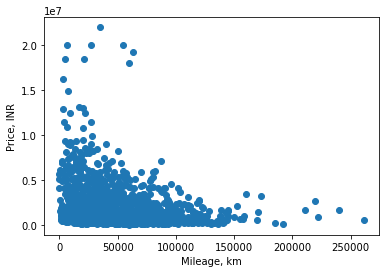

In [133]:
price_data = car_data['price_inr'].values
mileage_data = car_data['mileage_km'].values

fig,ax = plt.subplots()

#### YOUR CODE HERE ####
ax.scatter()



Now, say we wanted to also look at how the **number of bedrooms** affects the price of the house while still visualizing the price and area. With **`scatter()`**, we can add data to the **`c`** parameter to have this data represented by **color**.

<img src="figures/scatter_params.png" style="height:80%; width:50%;">

Note that we can **specify a colormap** with the **`cmap`** argument. You can look at the different colormap options [here](https://matplotlib.org/stable/users/explain/colors/colormaps.html).

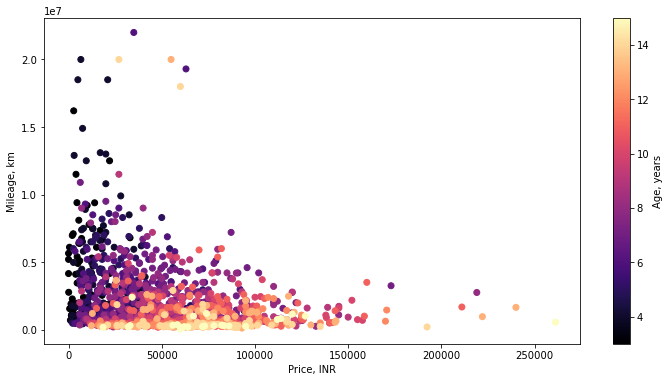

In [166]:
# Extract the data to plot
price_data = car_data['price_inr'].values
mileage_data = car_data['mileage_km'].values
age_data = car_data['age_yr'].values

fig,ax = plt.subplots(figsize=(12,6))

sc = ax.scatter(mileage_data,price_data,c=age_data,cmap='magma')
ax.set_xlabel('Price, INR')
ax.set_ylabel('Mileage, km')
# the c=tank_data tells scatter() to code the bedroom data as the colors
# the cmap='magma' tells scatter() to use a colormap called "magma"
# the sc=ax.scatter() is needed to add a colorbar

cax = fig.colorbar(sc)
# Adds a colorbar (called cax) to the scatter axes (called sc) on our figure (called fig)

cax.set_label('Age, years')
# Adds label to colorbar

<span style="color:blue"><u>**Exercise 8**</u> (10 minutes):

Create a scatterplot that displays the relationships between a **used car's mileage, price, and engine size (`engine_cc`)**.
* Experiment around with what goes on the **x-axis**, **y-axis**, and **color axis**. Some visualizations may look better than others!
* Add an appropriate **title** and **axes labels** to your plot.
* **Customize** your plot as you wish - you may choose the marker shape, marker size, color map, etc.
    * You may need to look at the `scatter()` [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html) to look at what **keyword arguments** you need to use. If you can't find it in the documentation, try Googling and looking for results on **Stack Overflow**.

In [ ]:
price_data = car_data['price_inr'].values
mileage_data = car_data['mileage_km'].values
engine_data = car_data['engine_cc'].values

fig,ax = plt.subplots(figsize=(12,6))

#### YOUR CODE HERE ####
ax.scatter()



### `scatter()` Gallery

Below are some other examples of how scatter plots can be used:

<img src="figures/scatter_4D_example.png" style="height:65%; width:50%;">

<center>Dimensions represented: <b>Longitude</b> (x-axis); <b>Latitude</b> (y-axis); <b>Concentration, ppb</b> (color); <b>Number of measurements</b> (size)</center>


<img src="figures/scatter_4D_qual_example.png" style="height:90%; width:70%;">

* **How many dimensions** are represented in the scatter plot above? **What are those dimensions**?

Your answer here:
1.
2.
3.
4.

## Bar Charts

**Bar charts** are useful for seeing how different quantities compare to one another. They are different from line or scatter plots because **one of the axes** can be **qualitative or categorical** data.

For example, consider the **used car dataset** that we were using above; suppose we counted up **how many cars of each color** there were and wanted to visualize them in a bar plot.

In [172]:
car_colors = car_data.groupby('color').size()
car_colors

color
Beige       5
Black     149
Blue      170
Bronze     26
Brown      79
Gold       25
Green      12
Grey      202
Maroon     33
Orange     16
Others     11
Purple      4
Red       143
Silver    267
White     732
Yellow      6
dtype: int64

To use the **`bar()`** function ([documentation here](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html)), it looks like we need to specify values for the **x-axis**, as well as the values in our data to represent the bar **heights**:

<img src="figures/bar_doc1.png" style="height:30%; width:60%;">
<img src="figures/bar_doc2.png" style="height:45%; width:60%;">

To plot this data using **`bar()`**, we put the **colors** on the x-axis and the **number of cars** as the heights:

<BarContainer object of 16 artists>

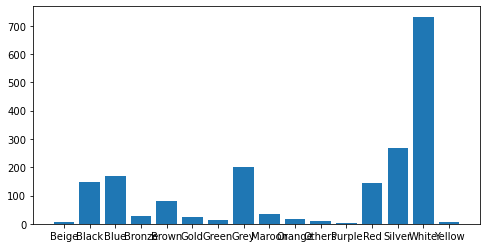

In [188]:
colors = car_colors.index
color_count = car_colors.values

fig,ax = plt.subplots(figsize=(8,4))
ax.bar(colors,color_count)

#### YOUR CODE HERE ####



However, you may notice that the labels on the x-axis overlap and are difficult to read. How can we fix this?

<span style="color:blue"><u>**Exercise 9**</u> </span> (7 minutes):

One solution to the problem above is to **rotate the x-tick labels**.
* Use the **`set_xticklabels()`** method to rotate the x-tick labels. You may find this [Stack Overflow post](https://stackoverflow.com/questions/10998621/rotate-axis-tick-labels) useful.
    * You will need to use a keyword argument - the key is to figure out the keyword!
* Add appropriate **x- and y-axis labels**.
* Add any other **customizations** you'd like.
    * You can change the bar colors, add/change the bar outlines, add labels, etc. Look under Other Parameters on the **`bar()`** [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html) for more information.

In [ ]:
### YOUR CODE HERE ####

fig,axs = plt.subplots()


## Histograms

**Histograms** are useful for visualizing the **frequency** of different values in a dataset. They may look similar to bar charts, but the **values on the x-axis represent bin edges**, where your data is sorted into these bins. The **bar heights represent the counts/frequencies of the values in your data**, such that the resulting plot tells you about the **distribution of values in the dataset**. As such, the input data for **`hist()`** is a different form than the input data for **`bar()`**.

To make a histogram with Matplotlib, we use the **`hist()`** function ([documentation here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)). It looks like the **`hist()`** function only requires one input: **`x`**, or the data you want sorted into bins and plotted.

<img src="figures/hist_doc1.png" style="height:20%; width:60%;">
<img src="figures/hist_doc2.png" style="height:45%; width:60%;">

For example, say we wanted to look at the **distribution of the different used car prices** with a histogram - i.e., how many used cars were sold at each price range?

First, let's take a look at the data that goes into the **`hist()`** function.

**How does this data format differ from the data that went into the `bar()` function?**

In [8]:
price_data = car_data['price_inr'].values
price_data

array([ 515000,  610000,  625000, ..., 1150000, 1195000, 2400000],
      dtype=int64)

To plot the histogram, we simply put the data we want binned, **`price_data`**, into the **`hist()`** function:

(array([1.472e+03, 2.490e+02, 9.200e+01, 3.700e+01, 1.300e+01, 7.000e+00,
        1.000e+00, 1.000e+00, 4.000e+00, 4.000e+00]),
 array([   49000.,  2244100.,  4439200.,  6634300.,  8829400., 11024500.,
        13219600., 15414700., 17609800., 19804900., 22000000.]),
 <BarContainer object of 10 artists>)

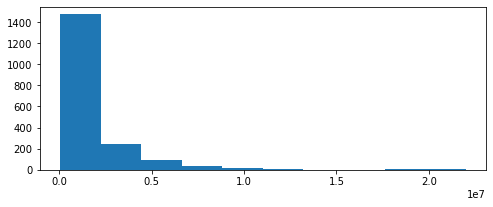

In [9]:
fig,ax = plt.subplots(figsize=(8,3))
ax.hist(price_data)

<span style="color:blue"><u>**Exercise 9**</u></span> (10 minutes):

In the **`hist()`** function, you can also specify the **bins** you want on the histogram. Looking at the documentation in the images above, we can see that there are several ways to set this:

1. Specify the **number of bins** you want.
2. Specify the **bin edges** you want.

In the cell below, you will **create 2 histograms of the used car mileage data** on two different subplots.
* Add the **mileage data (`mileage_data`) to both axes (i.e., both subplots)** using the `hist()` function.
* On the first subplot, **set the bins to the number 20.**
* On the second subplot, **set the bins edges to go from 0 to 250,000 in increments of 25,000 km.**
    * You can type these out in a list (e.g., `[0, 25000, 50000, ...]`), or you can use the `range()` function.
* Make sure your plot has appropriate **x- and y-axis labels**.

(array([190., 243., 276., 321., 283., 257., 152.,  70.,  37.,  21.,  12.,
          6.,   3.,   3.,   1.,   0.,   3.,   0.,   1.,   1.]),
 array([     0. ,  13061.8,  26123.6,  39185.4,  52247.2,  65309. ,
         78370.8,  91432.6, 104494.4, 117556.2, 130618. , 143679.8,
        156741.6, 169803.4, 182865.2, 195927. , 208988.8, 222050.6,
        235112.4, 248174.2, 261236. ]),
 <BarContainer object of 20 artists>)

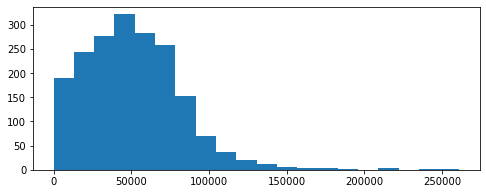

In [10]:
mileage_data = car_data['mileage_km'].values

fig,axs = plt.subplots(2,1,figsize=(8,3))

#### YOUR CODE HERE ####
axs[0].hist()
axs[1].hist()


## Box and Whisker/Violin Plots

Like histograms, **box and whisker and violin plots** are also useful for **visualizing the distribution of your data** as well as some **basic statistics** about it (e.g., mean, median, interquartile ranges (IQRs)). As such, their input data is very similar to the data format we used to plot the histograms.

To make a boxplot with Matplotlib, we use the **`boxplot()`** function ([documentation here](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.boxplot.html)). Similar to **`hist()`**, the **`boxplot()`** function only requires one input: **`x`**, or the data you want plotted.

<img src="figures/boxplot_doc1.png" style="height:28%; width:60%;">
<img src="figures/boxplot_doc2.png" style="height:45%; width:60%;">

As we can see from the documentation above, **`boxplot()`** function plots the **+/- 1.5 x interquartile ranges**, the **+/- interquartile ranges**, and the **median** of your data.

For example, if we wanted to **make a boxplot of the used car prices** to get an idea of its spread, we would simply put the data we want plotted into the **`boxplot()`** function:

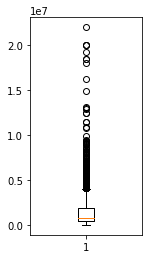

In [31]:
price_data = car_data['price_inr'].values

fig,ax = plt.subplots(figsize=(2,4))
ax.boxplot(price_data);

<span style="color:blue"><u>**Exercise 10**</u></span> (10 minutes):

In this exercise, you will make **4 separate box plots** of the **used car price**, **mileage**, **engine size**, and **tank size** on 4 different subplots.
* **Create a figure** (called `fig`) and **collection of axes** (called `axs`) with **4 subplots** in a single row (1 row, 4 columns).
    * Set the figure size (`figsize` keyword argument) to a size that accommodates all the data.
* Add the **different datasets** to each **subplot** (doesn't matter what order).
* Add appropriate **x-tick labels** to each subplot.
* Add appropriate **y-axis labels** to each subplot.
* Add a **super title** (a title that goes above all the subplots) to the figure using the **`fig.suptitle()`** method.

In [ ]:
price_data = car_data['price_inr'].values
mileage_data = car_data['mileage_km'].values
engine_data = car_data['engine_cc'].values
tank_data = car_data['tank_size_l'].values

#### YOUR CODE HERE ####
fig,axs = plt.subplots()


To make a violin plot with Matplotlib, we use the **`violinplot()`** function ([documentation here](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.violinplot.html)). Similar to **`boxplot`** and **`hist()`**, **`violinplot()`** only requires one input: **`dataset`**, or the data you want plotted.

<img src="figures/violin_doc1.png" style="height:40%; width:60%;">
<img src="figures/violin_doc2.png" style="height:25%; width:60%;">

<span style="color:blue"><u>**Exercise 11**</u></span> (10 minutes):

In this exercise, you will plot the same data (**used car price**, **mileage**, **engine size**, and **tank size**) as <span style="color:blue">Exercise 10</span> on **4 separate violin plots**.

Feel free to copy the code you wrote in <span style="color:blue">Exercise 10</span> and modify it for this exercise.

* **Create a figure** (called `fig`) and **collection of axes** (called `axs`) with **4 subplots** in a single row (1 row, 4 columns).
    * Set the figure size (`figsize` keyword argument) to a size that accommodates all the data.
* Add the **different datasets** to each **subplot** (doesn't matter what order).
* Add appropriate **x-tick labels** to each subplot.
* Add appropriate **y-axis labels** to each subplot.
* Add a **super title** (a title that goes above all the subplots) to the figure using the **`fig.suptitle()`** method.

In [ ]:
#### YOUR CODE HERE ####
fig,axs = plt.subplots()



# Plotting in 3D

Sometimes, you may need to plot data spatially, with multiple dimensions. This is especially true if you have **gridded data**, e.g., a **value corresponding to a specific location** (e.g., a concentration at a coordinate (x,y)), or if you are working with **geospatial data** and **making maps**.

A few **Matplotlib functions** that all work similarly for plotting gridded data are:

* **`contour()`** and **`contourf()`**: draw contour lines and filled contours, respectively
* **`pcolor()`** and **`pcolormesh()`**: draw heatmaps

For simplicity, we will just focus on **`contourf()`**, since it takes a similar data input format as the other functions.

<img src="figures/contourf_doc1.png" style="height:20%; width:60%;">
<img src="figures/contourf_doc2.png" style="height:40%; width:60%;">

Technically, `contourf()` only requires you to specify **Z**, or the colors of your filled contour map.

Note that **Z** must be a **2D array** - i.e., it must have **M rows** and **N columns**.
* `contourf(Z)`
    * In this case, the coordinates (X and Y) are automatically set from 1 to n, where n is the size of your dataset (i.e., if Z is 50 x 100, then X goes from 1 to 50, and Y goes from 1 to 100).

Let's try it out on some **made up data** on some arbitrary **bivariate function, f(x,y)**. Below we've just created a function equivalent to the equation: <center>$f(x,y) = (1-\frac{x}{2}+x^5+y^3)*e^{-x^2+y^2}$

In [3]:
def f(x,y):
    return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)

Now let's create our **Z array** using this function by **plugging in some x and y values**. First, we will **create some values for x and y**.

In [4]:
x = np.linspace(-3,3,61)
y = np.linspace(-2,2,41)
print(x)
print(y)

[-3.  -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3 -2.2 -2.1 -2.  -1.9 -1.8 -1.7
 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3
 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1
  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5
  2.6  2.7  2.8  2.9  3. ]
[-2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9 -0.8 -0.7
 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7
  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2. ]


In this case, **x** is made up of values **between -3 and 3**, in **increments of 0.1**, while **y** is made of values between **-2 and 2** in **increments of 0.1**.

Now let's **plug x and y** into our function, f(x,y).

In [5]:
meshx,meshy = np.meshgrid(x,y) # This function will be explained further below

Z = f(meshx,meshy)

And now we plot our contour:

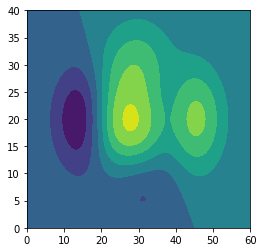

In [97]:
fig, ax = plt.subplots(figsize=(4,4))
ax.contourf(Z);

However, in many cases, you might want to **specify X and Y**. In the example above, our **x and y values go from -3 to 3**, so ideally we'd like that represented in our plot.
* If you were trying to **plot a map**, you would want to set **X to represent your longitudes** and **Y to represent your latitudes**.

In this case then, we'll use:
* `contourf(X,Y,Z)`

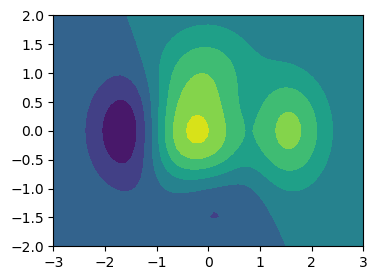

In [42]:
fig, ax = plt.subplots(figsize=(4,3))
ax.contourf(meshx,meshy,Z);

But what are **`meshx` and `meshy`**, and why can't we just use `x` and `y`?

Recall the line of code above that we used to create **`meshx`** and **`meshy`**. What exactly does `meshgrid()` do?

In [6]:
meshx,meshy = np.meshgrid(x,y)

In [7]:
meshx.shape

(41, 61)

Let's compare the differences between **`x` and `y`** and **`meshx` and `meshy`**.

In [13]:
x.shape

(61,)

In [16]:
print('x:'+str(x.shape))
print(x)
print('meshx:'+str(meshx.shape))
print(meshx)

print('y:'+str(y.shape))
print(y)
print('meshy:'+str(meshx.shape))
print(meshy)

x:(61,)
[-3.  -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3 -2.2 -2.1 -2.  -1.9 -1.8 -1.7
 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3
 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1
  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5
  2.6  2.7  2.8  2.9  3. ]
meshx:(41, 61)
[[-3.  -2.9 -2.8 ...  2.8  2.9  3. ]
 [-3.  -2.9 -2.8 ...  2.8  2.9  3. ]
 [-3.  -2.9 -2.8 ...  2.8  2.9  3. ]
 ...
 [-3.  -2.9 -2.8 ...  2.8  2.9  3. ]
 [-3.  -2.9 -2.8 ...  2.8  2.9  3. ]
 [-3.  -2.9 -2.8 ...  2.8  2.9  3. ]]
y:(41,)
[-2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9 -0.8 -0.7
 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7
  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2. ]
meshy:(41, 61)
[[-2.  -2.  -2.  ... -2.  -2.  -2. ]
 [-1.9 -1.9 -1.9 ... -1.9 -1.9 -1.9]
 [-1.8 -1.8 -1.8 ... -1.8 -1.8 -1.8]
 ...
 [ 1.8  1.8  1.8 ...  1.8  1.8  1.8]
 [ 1.9  1.9  1.9 ...  1.9  1.9  1.9]
 [ 2.   2.   2. 

What exactly is happening? Why are `meshx` and `meshy` just repeats of `x` and `y`, and why do we need this?

The reason is because **`Z` is a 41x61 array of data**, with 2501 total data points that were calculated using all **2501 (i.e., 41 x 61) possible combinations** of the values in `x` and `y`. As such, **every point within `Z` has a corresponding coordinate pair, (x,y)**.

For example, the **first value in Z** corresponds to the value of **f(-3,-2)**, or when **<span style="color:blue">x = -3</span> and <span style="color:red">y = -2</span>**.

<center><img src="figures/meshgrid_explanation.png" style="height:90%; width:90%;">

### Colorbars

When plotting contours, we will often need a **colorbar**.

A **colorbar** has its own **`axes`**.

<img src="figures/colorbar_doc.png" style="height:35%; width:80%;">

<u>To add a colorbar to a figure:</u>
1. You must first **create a handle** for the plot on the axes, or make it "mappable"; for example, if you plotted our data `Z` on a filled contour using `contourf()` on an axes called `ax`:
<center><code>handle = ax.contourf(Z)</center></code>
2. Then, you **tell your figure `fig` that you want to add a colorbar to it** by calling the `colorbar()` method on it. Here, you also specify the axes' handle:
<center><code>fig.colorbar(handle)</center></code>
* Specifying the axes' handle **tells the colorbar what data the colorbar should follow**.

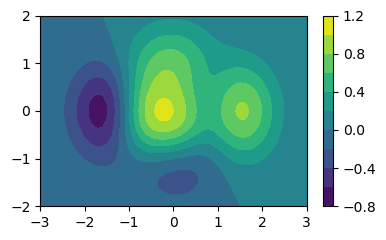

In [51]:
fig, ax = plt.subplots(figsize=(4,2.5))
handle = ax.contourf(meshx, meshy, Z, 10)
fig.colorbar(handle)

plt.tight_layout()

## Plotting Maps

**Cartopy** is a Python package used to create maps. It supports **different map projections and administrative boundaries** and is **well integrated with Matplotlib**, so it is easy to use Matplotlib's plotting functions on top of it.

**Cartopy** must be imported separately from Matplotlib:

In [50]:
import cartopy

In order to add a **map outline** to a plot, you must first **pick a map projection**. This is done by setting the <u>**C**</u>oordinate <u>**R**</u>eference <u>**S**</u>ystem, or `crs`, in Cartopy.

Cartopy has over a dozen projections you can choose from ([documentation here](https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html)), including:
<img src="figures/cartopy_projections.png" style="height:20%; width:60%;">

To set your `crs` to the **projection** you want, the syntax would be:

In [52]:
my_crs = cartopy.crs.PlateCarree()

Now let's actually **add some mapping data of this projection to our figure axes**.

Note that when you set a projection to a Matplotlib axes, it automatically becomes a **GeoAxes** ([documentation here](https://scitools.org.uk/cartopy/docs/v0.22/reference/generated/cartopy.mpl.geoaxes.GeoAxes.html)).

**GeoAxes** are similar to the normal Matplotlib axes we know, except they are specially formatted for maps. For example, they have a handy function that automatically **draws coastlines**:

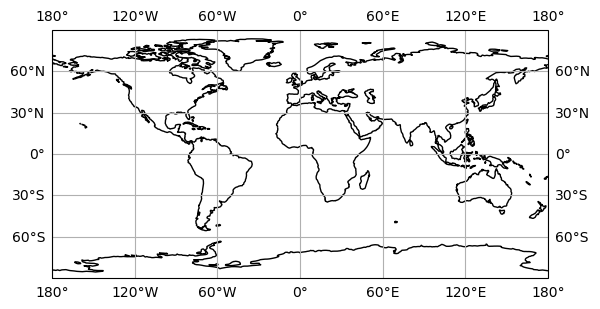

In [85]:
# Creates an axes and sets the projection of the axes
ax = plt.axes(projection=my_crs)

# Add coastlines to the axes
ax.coastlines()

# Add x and y axes labels
ax.gridlines(draw_labels=True)

On a GeoAxes, we can even add other [useful geographical features that are built-in](https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html) to the Cartopy package:

| Name    | Description |
| :-------- | :------- |
| `cartopy.feature.BORDERS`  | Country boundaries.|
| `cartopy.feature.COASTLINE` | Coastline, including major islands.|
| `cartopy.feature.LAKES`    | Natural and artificial lakes.|
| `cartopy.feature.LAND`    | Land polygons, including major islands.|
| `cartopy.feature.OCEAN`    | Ocean polygons.|
| `cartopy.feature.RIVERS`   | Single-line drainages, including lake centerlines.|
|`cartopy.feature.STATES`|Automatically scaled state and province boundaries.|

For example, the syntax to **add the country boundaries feature** would be:

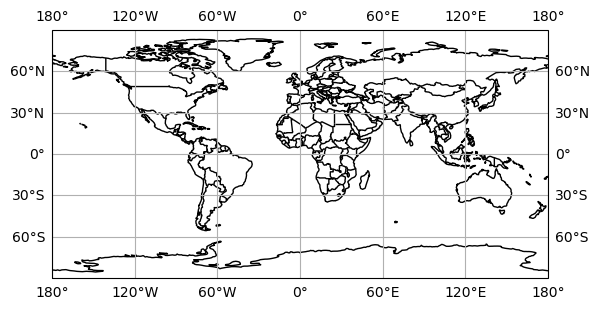

In [102]:
my_crs = cartopy.crs.PlateCarree()

ax = plt.axes(projection=my_crs)
ax.coastlines()
ax.gridlines(draw_labels=True)

# Add country borders to the axes
ax.add_feature(cartopy.feature.BORDERS)

Similar to our Matplotlib axes, we can still **add and format our classic Matplotlib plots** on top of the maps!

Below, to my GeoAxes, we can **add a scatterplot of longitudes and latitudes to the map** we created before.

Note that you must **ensure the data you add to your map is transformed to the correct projection**.

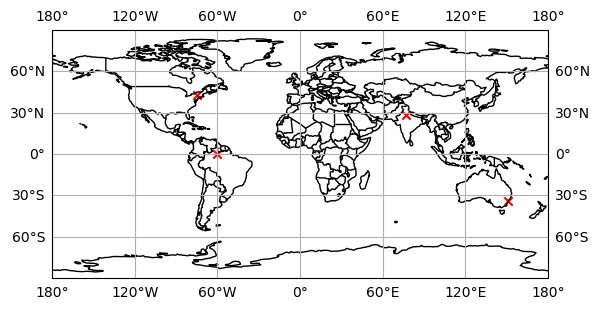

In [111]:
my_crs = cartopy.crs.PlateCarree()
ax = plt.axes(projection=my_crs)
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS)
ax.gridlines(draw_labels=True)

# Add scatter plot
lons = [-75, 77.2, 151.2, -60]
lats = [43, 28.6, -33.9, 0]
ax.scatter(lons, lats, marker='x', color='r', transform=my_crs)
ax.set_global()

<span style="color:blue"><u>**Exercise 12**</u></span>:

In this exercise, you will **make a map of the flight path** of some research aircraft. Suppose the research flight took place over the United States, with the following stops:

**(-121$^{\circ}$,39$^{\circ}$), (-112$^{\circ}$,47$^{\circ}$), (-100$^{\circ}$,32$^{\circ}$), (-94$^{\circ}$,38$^{\circ}$), (-79$^{\circ}$,38$^{\circ}$), (-70$^{\circ}$,45$^{\circ}$)**

1. **Create a list** called `flight_lon` that contains all the longitudes for the flight stops.
2. **Create a list** called `flight_lat` that contains all the latitudes for the flight stops.
3. **Create a GeoAxes** and set it to the **Plate Carree projection**.
7. **Add gridlines** to the GeoAxes.
4. **Add coastlines** to the GeoAxes.
6. **Add the states borders** feature to the GeoAxes.
7. **Add the plot of the flight stops** to the GeoAxes. You will need `flight_lon` and `flight_lat`, created in steps 1-2.
7. **Set the x- and y- limits** to contain the boundaries of the US.
    * For x-limits, this is roughly -125 to -65.
    * For y-limits, this is roughly 25 to 50.
8. Set your line plot to have an **'o' as the marker**, and the **line color to be red**.

**Note: copy code from the cells above as needed.**

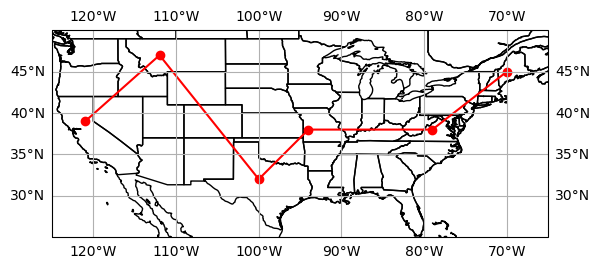

In [138]:
#### YOUR CODE HERE ####
flight_lon = []
flight_lat = []


### A quick aside on map projections...

Note that data must often be transformed into units corresponding to the map projection. You can find more information on how to do that in Cartopy [here](https://scitools.org.uk/cartopy/docs/v0.16/tutorials/understanding_transform.html).

For example, say you wanted to **plot the above flight data in a Robinson projection**. However, the Robinson projection doesn't take latitude/longitude as inputs. Thus, **the flight data has to be transformed to the correct projection.**

Since the flight data plotted as expected on the Plate Carree projection, we can assume the data is in that projection (hence `data_crs = cartopy.crs.PlateCarree()`).

To transform the flight data, you just have to specify what `crs` the flight data is in with the `transform = data_crs` keyword argument in the `plot()` function.

In [ ]:
# Flight data
flight_lon = [-121,-112,-100,-94,-79,-70]
flight_lat = [39,47,32,38,38,45]

# CRS you want your map in
my_crs = cartopy.crs.Robinson()

# CRS the data is in
data_crs = cartopy.crs.PlateCarree()

# Create GeoAxes with preferred CRS
ax = plt.axes(projection=my_crs)

# Add coastlines, features, gridlines
ax.coastlines()
ax.add_feature(cartopy.feature.STATES)
ax.gridlines(draw_labels=True)

# Plot the data AND specify what projection the data is in
# This tells Cartopy what projection it needs to transform the data from
ax.plot(flight_lon,flight_lat,marker='o',color='red',transform=data_crs)
ax.set_extent([-125,-65,25,50],crs=data_crs)

# Challenge #1: Carbon Cycle $CO_2$ and $CH_4$ Data

In this exercise, we will put together some of the concepts we learned on:
* **Subplots**
* **Line plots**
* **Data formatting**

We will be using real data from the <b>NOAA ESRL Carbon Cycle Cooperative Global Air Sampling Network</b>.

In this dataset, we have **measurements of**:
  * Atmospheric carbon dioxide ($CO_2$), in ppm
  * Methane ($CH_4$), in ppb 
  * $\delta^{13}C/CO_{2}$, in per mil (‰)
  * $\delta^{13}C/CH_{4}$, in per mil (‰)
  
At **two different stations**:
  * CGO = Cape Grim, Tasmania, Australia
  * MHD = Mace Head, County Galway, Ireland
  
For **every month for certain years** between 1984 and 2018.
  

The data is formatted in a text file like this:    
    
```
    Station code | Year | Month | Measurement

    CGO            1984     4       341.63  
```

Source: https://www.esrl.noaa.gov/gmd/dv/data/

**Run the cell below to read in the data and format it for plotting**.

Don't worry too much about the details of the code - just make sure you understand the data format after running the cell!

In [151]:
# Read data to get all the datasets into arrays we can plot
# CO2 
from datetime import datetime
read_data_kwargs = dict(skiprows=68, usecols=(1, 2, 3), unpack=True)

cgo_co2_yr, cgo_co2_mn, cgo_co2_val = np.loadtxt('data/co2_cgo_surface-flask_1_ccgg_month.txt', 
                                                 **read_data_kwargs)
mhd_co2_yr, mhd_co2_mn, mhd_co2_val = np.loadtxt('data/co2_mhd_surface-flask_1_ccgg_month.txt', 
                                                 **read_data_kwargs)
# C13/C12 in CO2 (d13C (CO2))
cgo_co2c13_yr, cgo_co2c13_mn, cgo_co2c13_val = np.loadtxt('data/co2c13_cgo_surface-flask_1_sil_month.txt', 
                                                          **read_data_kwargs)
mhd_co2c13_yr, mhd_co2c13_mn, mhd_co2c13_val = np.loadtxt('data/co2c13_mhd_surface-flask_1_sil_month.txt', 
                                                          **read_data_kwargs)
# CH4
cgo_ch4_yr, cgo_ch4_mn, cgo_ch4_val = np.loadtxt('data/ch4_cgo_surface-flask_1_ccgg_month.txt', 
                                                 **read_data_kwargs)
mhd_ch4_yr, mhd_ch4_mn, mhd_ch4_val = np.loadtxt('data/ch4_mhd_surface-flask_1_ccgg_month.txt', 
                                                 **read_data_kwargs)
# C13/C12 in CH4 (d13C (CH4))
cgo_ch4c13_yr, cgo_ch4c13_mn, cgo_ch4c13_val = np.loadtxt('data/ch4c13_cgo_surface-flask_1_sil_month.txt',
                                                          **read_data_kwargs)
mhd_ch4c13_yr, mhd_ch4c13_mn, mhd_ch4c13_val = np.loadtxt('data/ch4c13_mhd_surface-flask_1_sil_month.txt', 
                                                          **read_data_kwargs)
# Get the datetime for all the timeseries
cgo_co2_time = [datetime(int(i), int(j), 1) for i, j in zip(cgo_co2_yr, cgo_co2_mn)]
mhd_co2_time = [datetime(int(i), int(j), 1) for i, j in zip(mhd_co2_yr, mhd_co2_mn)]

cgo_co2c13_time = [datetime(int(i), int(j), 1) for i, j in zip(cgo_co2c13_yr, cgo_co2c13_mn)]
mhd_co2c13_time = [datetime(int(i), int(j), 1) for i, j in zip(mhd_co2c13_yr, mhd_co2c13_mn)]

cgo_ch4_time = [datetime(int(i), int(j), 1) for i, j in zip(cgo_ch4_yr, cgo_ch4_mn)]
mhd_ch4_time = [datetime(int(i), int(j), 1) for i, j in zip(mhd_ch4_yr, mhd_ch4_mn)]

cgo_ch4c13_time = [datetime(int(i), int(j), 1) for i, j in zip(cgo_ch4c13_yr, cgo_ch4c13_mn)]
mhd_ch4c13_time = [datetime(int(i), int(j), 1) for i, j in zip(mhd_ch4c13_yr, mhd_ch4c13_mn)]

The variables you will be using for plotting are:

`
cgo_co2_time, cgo_co2_val
mhd_co2_time, mhd_co2_val
cgo_co2c13_time, cgo_co2c13_val
mhd_co2c13_time, mhd_co2c13_val
cgo_ch4_time, cgo_ch4_val
mhd_ch4_time, mhd_ch4_val
cgo_ch4c13_time, cgo_ch4c13_val
mhd_ch4c13_time, mhd_ch4c13_val
`

In this exercise, you will create a 2x2 set of subplots. On each subplot will be the time series of each different variable in the dataset. The following steps should help you break it down:
1. Create a **figure and subplots with 2 rows and 2 columns**.
2. On the **top left subplot**, plot the **$CO_2$ concentrations** over time from both sites.
3. On the **top right subplot**, plot the **$CH_4$ concentrations** over time from both sites.
4. On the **bottom left subplot**, plot the **$C/CO_2$ values** over time from both sites.
5. On the **bottom right subplot**, plot the **$C/CH_4$ values** over time from both sites.
6. Add appropriate **x- and y- labels** with the correct units on every subplot.
7. Format the **x- and y- ticks** appropriately (you may need to **rotate** them).

Before you start, take a look at some of these different variables to get a sense of **how the data is formatted**.

In [ ]:
cgo_co2_time
cgo_co2_val
mhd_co2_time
mhd_co2_val
cgo_co2c13_time
cgo_co2c13_val
mhd_co2c13_time
mhd_co2c13_val
cgo_ch4_time
cgo_ch4_val
mhd_ch4_time
mhd_ch4_val
cgo_ch4c13_time
cgo_ch4c13_val
mhd_ch4c13_time
mhd_ch4c13_val

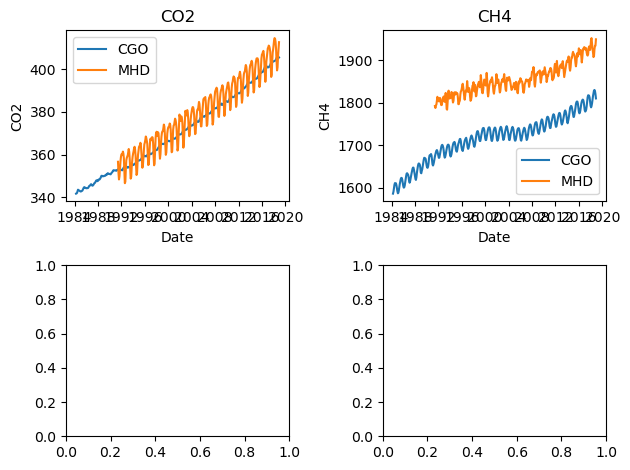

In [83]:
#### YOUR CODE HERE ####

# 1. Set up a grid of four subplots.
fig, axs = plt.subplots()

# 2. Plot the data from stations for the four variables measured. 
axs[0,0].plot()
axs[0,0].plot()

axs[0,1].plot()
axs[0,1].plot()

axs[].plot()

axs[].plot()

# 3. Set titles, x and y labels and add a legend.
axs[0,0].set_title('CO2')
axs[0,0].set_xlabel('Date')
axs[0,0].set_ylabel('CO2')
axs[0,0].legend()

axs[0,1].set_title()
axs[0,1].set_xlabel()
axs[0,1].set_ylabel()
axs[0,1].legend()

axs[]

axs[]

plt.tight_layout()

# Final Boss #2: Plotting Sea Surface Temperature (SST) on a Map

In this exercise, we will put together concepts on:
* Cartopy
* Plotting in 3D
    * Plotting gridded data
* `meshgrid()`

We will be using real sea surface temperature data from NASA JPL.

In this dataset, we have a **180x361 dataset of SST**, in K, on 16-JUN-2002. There a SST value for every one degree of longitude and latitude.

Source: https://podaac-tools.jpl.nasa.gov/las/UI.vm

Run the cell below to read in the data and format it correctly for plotting.

In [142]:
# Read modelling sst data
lon_raw, lat_raw, sst_raw = np.genfromtxt('data/AMSR-E_Level_3_Sea_Surface_Temperature_for_Climate_Model_Comparison.csv', delimiter=',', 
                              skip_header=10,usecols=(2, 3, 4), unpack=True)
# Reshape into a grid of sst with corresponding lat and lon coordinates
lon = np.unique(lon_raw)
lat = np.unique(lat_raw)
sst = np.reshape(sst_raw,(len(lat),len(lon)));
# Replace missing values with nans
sst[sst<0] = np.nan

In this exercise, you will create **one subplot** that has a world map of the coastlines along with the SST plotted on it. Your final figure should look like this:
<img src="figures/plotting_challenge_2.png" style="height:20%; width:60%;">

These steps should help you get started:
1. **Create a GeoAxes** and set it to the **Plate Carree projection**.
2. **Add gridlines** to the GeoAxes.
3. **Add coastlines** to the GeoAxes.
4. **Prepare the longitude (`lon`) and latitude (`lat`) for plotting** using the `meshgrid()` function.
    * You should create a `mesh_lon` and `mesh_lat` similar to te `meshx` and `meshy` we created in the `contourf()` section.
7. **Use the `pcolor()` function to plot the SST** to the GeoAxes. You will need `mesh_lon` and `mesh_lat`, created in steps.
7. **Set the x- and y- limits** to -180 to 180 and -90 to 90, respectively.

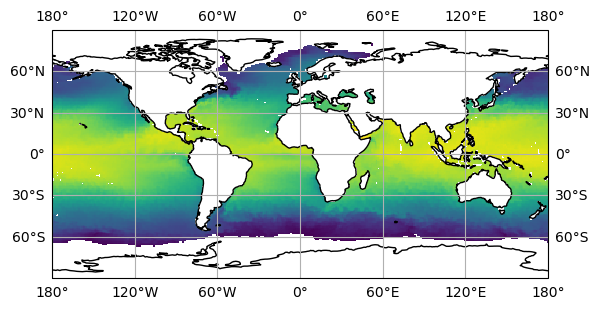

In [147]:
#### YOUR CODE HERE ####

my_crs = cartopy.crs.PlateCarree()
ax = plt.axes()

# Default sequantial and diverging colormaps

More info: [colormaps reference](https://matplotlib.org/stable/gallery/color/colormap_reference.html).

<img src="figures/colormaps_reference_00.png" >
<img src="figures/colormaps_reference_03.png" >

### Don't let bad colormaps mess with your science!
Also referred to as rainbow, jet is a problematic colormap that promotes bad science. To explore the reasons why, and to see examples of how jet hides craters on Mars and distorts photographs, go read [this blog post](https://titan.uio.no/english/2021/improper-use-colours-can-distort-scientific-data) or [this Nature Communications paper](https://www.nature.com/articles/s41467-020-19160-7). 

Python has great preceptually uniform default colormaps. If they're not quite what you want, check out more good colourmaps crafted for [oceanography](https://matplotlib.org/cmocean/) and [general science + geophysics](http://www.fabiocrameri.ch/colourmaps.php).
A good colormap is perceptually uniform, intuitively suits the data being plotted and is color deficient vision-friendly. 

#  Saving figures

Use `fig.savefig(fname, dpi=, facecolor=, bbox_inches='tight', **kwargs)`. 

Matplotlib supports a range of vector (e.g. pdf) and raster (e.g. png) formats. The resolution of raster images can be set with the dpi (dots per inch) argument. 
(Sometimes, vector quality is desirable for only some elements of a figure, while other parts can be rasterized to reduce the figure file size. In that case, [```Axes.set_rasterization_zorder```](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_rasterization_zorder.html) and the zorder plotting argument can be used to decide which figure elements should be rasterized.)

In [40]:
display(fig.canvas.get_supported_filetypes())

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

In [41]:
# Save our figure above
fig.savefig(base_dir/'figures/MY_AWESOME_COMBINED_FIGURE.png', 
            # facecolor='white',
            transparent=True,
            bbox_inches='tight')
plt.show()

## References: 
* https://matplotlib.org/faq/usage_faq.html
* http://www.labri.fr/perso/nrougier/teaching/matplotlib/matplotlib.html
* NAO image: UCAR, https://www.windows2universe.org/?page=/earth/climate/images/nao_lg_gif_image.html 

![](../figures/meme_mpl.png)

([by @sanjanacurtis on twitter](https://twitter.com/sanjanacurtis/status/1362495499689951236/photo/1))